# Create AI Machine Learning Agent That Makes 30+ ML Models In 30 Seconds

In this notebook, I will show you how to create an AI machine learning agent that can make 30+ machine learning models in 30 seconds. This AI agent will be able to make models for classification and regression tasks. 

The AI agent uses `h2o` library for AutoML. `h2o` is an open-source machine learning platform that is used for building machine learning models. It is easy to use and provides a lot of flexibility in building machine learning models.

### Want To Become A Full-Stack Generative AI Data Scientist?

![Generative AI Data Scientist](../../img/become_a_generative_ai_data_scientist.jpg)

I teach Generative AI Data Science to help you build AI-powered data science apps. [**Register for my next Generative AI for Data Scientists workshop here.**](https://learn.business-science.io/ai-register)

## H2O Machine Learning Agent

In this notebook, we will create an AI Machine Learning Agent that makes 30+ machine learning models in 30 seconds. The AI Agent will use the H2O AutoML library to create the models, store the models on your computer, and provide you with a summary of the models, performance metrics, and full breakdown of the AI machine learning workflow.

### Load Libraries

In [1]:

from langchain_openai import ChatOpenAI
import pandas as pd
import h2o # pip install h2o
import os
import yaml

from ai_data_science_team.ml_agents import H2OMLAgent

### Load The Customer Churn Dataset

The Customer Churn dataset contains data on customers who have left the company. The dataset contains 21 columns and 7,043 rows. The target variable is `Churn` which is a binary variable that indicates whether the customer has left the company or not.

In [2]:
df = pd.read_csv("data/churn_data.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### LLM Setup

Run the code to set up your OpenAI API Key and set up key inputs for the LLM model creation and H2O AutoML model creation.

In [3]:
os.environ['OPENAI_API_KEY'] = "YOUR_OPENAI_API_KEY"
os.environ["OPENAI_API_KEY"] = yaml.safe_load(open('../credentials.yml'))['openai']

# Define constants for model, logging, and paths
MODEL    = "gpt-4o-mini"
LOG      = True
LOG_PATH = "logs/"
MODEL_PATH = "h2o_models/"

# Initialize the language model
llm = ChatOpenAI(model=MODEL)
llm

ChatOpenAI(profile={'max_input_tokens': 128000, 'max_output_tokens': 16384, 'image_inputs': True, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'pdf_inputs': True, 'pdf_tool_message': True, 'image_tool_message': True, 'tool_choice': True}, client=<openai.resources.chat.completions.completions.Completions object at 0x15553a7d0>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x16a789b70>, root_client=<openai.OpenAI object at 0x155539090>, root_async_client=<openai.AsyncOpenAI object at 0x16a789ab0>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********'), stream_usage=True)

### Create the Agent

Run the code to create the AI Machine Learning Agent that makes 30+ machine learning models in 30 seconds.

- `model` - The LLM to use.
- `log` and `log_path` - Set to `True` to log the Python function (pipeline) to a file in the `LOG_PATH` directory. (/logs by default)
- `model_directory` - The directory to save the models. (/models by default)
- `enable_mlflow` - Set to `True` to enable MLflow tracking. This is required to complete [the MLflowToolsAgent tutorial](/examples/ml_agents/mlflow_tools_agent.ipynb).

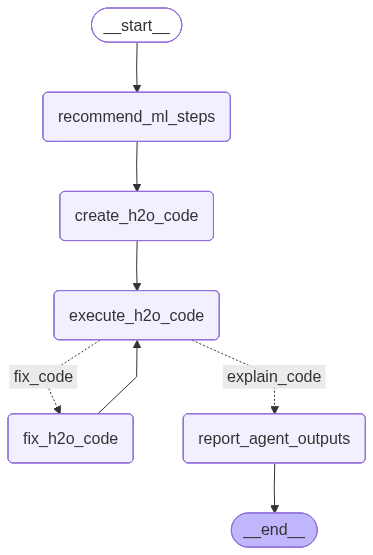

In [4]:
ml_agent = H2OMLAgent(
    model=llm, 
    log=True, 
    log_path=LOG_PATH,
    model_directory=MODEL_PATH, 
    enable_mlflow=True, # Use this if you wish to log to MLflow 
)
ml_agent

### Run the Agent

Run the code to run the AI Machine Learning Agent and create the models.

In [5]:
ml_agent.invoke_agent(
    data_raw=df.drop(columns=["customerID"]),
    user_instructions="Please do classification on 'Churn'. Use a max runtime of 30 seconds.",
    target_variable="Churn"
)

---H2O ML AGENT----
    * RECOMMEND MACHINE LEARNING STEPS
    * CREATE H2O AUTOML CODE
      File saved to: logs/h2o_automl.py
    * EXECUTING AGENT CODE
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "13.0.2" 2020-01-14; Java(TM) SE Runtime Environment (build 13.0.2+8); Java HotSpot(TM) 64-Bit Server VM (build 13.0.2+8, mixed mode, sharing)
  Starting server from /Users/mdancho/opt/anaconda3/envs/ds4b_301p_dev_langchain_latest/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/3s/bjq91lxs0jq9_zcw2q4l95gh0000gn/T/tmp61r3h8db
  JVM stdout: /var/folders/3s/bjq91lxs0jq9_zcw2q4l95gh0000gn/T/tmp61r3h8db/h2o_mdancho_started_from_python.out
  JVM stderr: /var/folders/3s/bjq91lxs0jq9_zcw2q4l95gh0000gn/T/tmp61r3h8db/h2o_mdancho_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... su

H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,"1 year, 8 months and 25 days"
H2O_cluster_name:,H2O_from_python_mdancho_9wai98
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,12 Gb
H2O_cluster_total_cores:,14
H2O_cluster_allowed_cores:,14
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
13:51:48.755: Stopping tolerance set by the user is < 70% of the recommended default of 0.011915743770127944, so models may take a long time to converge or may not converge at all.

███████████████████████████████████████████████████████████████| (done) 100%
    * REPORT AGENT OUTPUTS


/Users/mdancho/opt/anaconda3/envs/ds4b_301p_dev_langchain_latest/lib/python3.10/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


#### Leaderboard

The leaderboard shows the ML models created by the AI Machine Learning Agent ranked by various ML metrics.

In [6]:
# Retrieve and display the leaderboard of models
ml_agent.get_leaderboard()

,model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
0,GBM_1_AutoML_1_20251209_135148,0.847994,0.414785,0.664259,0.237652,0.366501,0.134323
1,GLM_1_AutoML_1_20251209_135148,0.845134,0.417470,0.652031,0.234092,0.368076,0.135480
2,GBM_5_AutoML_1_20251209_135148,0.843070,0.418699,0.658564,0.234749,0.368621,0.135881
3,GBM_2_AutoML_1_20251209_135148,0.841271,0.420844,0.652134,0.234277,0.369791,0.136745
4,XGBoost_3_AutoML_1_20251209_135148,0.837265,0.426440,0.652648,0.242080,0.372599,0.138830
5,XRT_1_AutoML_1_20251209_135148,0.837091,0.425837,0.648249,0.239309,0.371830,0.138257
6,GBM_3_AutoML_1_20251209_135148,0.836745,0.426057,0.648271,0.240586,0.371945,0.138343
7,XGBoost_1_AutoML_1_20251209_135148,0.834798,0.433328,0.642648,0.249852,0.376036,0.141403
8,XGBoost_grid_1_AutoML_1_20251209_135148_model_2,0.834671,0.434448,0.637864,0.242511,0.375776,0.141208
9,GBM_4_AutoML_1_20251209_135148,0.832676,0.432115,0.638565,0.252440,0.374557,0.140293


#### Get The AI Generated Python Code

The AI Machine Learning Agent will generate Python code that was used to create the models.

In [7]:
# Get the H2O training function in markdown format
ml_agent.get_h2o_train_function(markdown=True)

```python
# Disclaimer: This function was generated by AI. Please review before using.
# Agent Name: h2o_ml_agent
# Time Created: 2025-12-09 13:51:40

def h2o_automl(
    data_raw,
    target: str = "Churn",
    max_runtime_secs: int = 30,
    exclude_algos: list = None,
    balance_classes: bool = False,
    nfolds: int = -1,
    seed: int = 1,
    max_models: int = 20,
    stopping_metric: str = "AUC",
    stopping_tolerance: float = 0.001,
    stopping_rounds: int = 3,
    sort_metric: str = "AUC",
    model_directory: str = "h2o_models/",
    log_path: str = "logs/",
    enable_mlflow: bool = False,
    mlflow_tracking_uri: str = None,
    mlflow_experiment_name: str = "H2O AutoML",
    mlflow_run_name: str = None,
    **kwargs
):
    import h2o
    from h2o.automl import H2OAutoML
    import pandas as pd

    # Optional MLflow usage
    if enable_mlflow:
        import mlflow
        if mlflow_tracking_uri:
            mlflow.set_tracking_uri(mlflow_tracking_uri)
        mlflow.set_experiment(mlflow_experiment_name)
        run_context = mlflow.start_run(run_name=mlflow_run_name)
    else:
        # Dummy context manager to skip MLflow if not enabled
        from contextlib import nullcontext
        run_context = nullcontext()

    exclude_algos = exclude_algos or ["DeepLearning"]  # default if not provided

    # Convert raw data to DataFrame
    df = pd.DataFrame(data_raw)

    with run_context as run:
        # If using MLflow, track run ID
        run_id = None
        if enable_mlflow and run is not None:
            run_id = run.info.run_id

        # Initialize H2O
        h2o.init()

        # Create H2OFrame
        data_h2o = h2o.H2OFrame(df)

        # Setup AutoML
        aml = H2OAutoML(
            max_runtime_secs=max_runtime_secs,
            exclude_algos=exclude_algos,
            balance_classes=balance_classes,
            nfolds=nfolds,
            seed=seed,
            max_models=max_models,
            stopping_metric=stopping_metric,
            stopping_tolerance=stopping_tolerance,
            stopping_rounds=stopping_rounds,
            sort_metric=sort_metric,
            **kwargs
        )

        # Train
        x = [col for col in data_h2o.columns if col != target]
        aml.train(x=x, y=target, training_frame=data_h2o)

        # Save model if we have a directory/log path
        if model_directory is None and log_path is None:
            model_path = None
        else:
            path_to_save = model_directory if model_directory else log_path
            model_path = h2o.save_model(model=aml.leader, path=path_to_save, force=True)

        # Leaderboard (DataFrame -> dict)
        leaderboard_df = aml.leaderboard.as_data_frame()
        leaderboard_dict = leaderboard_df.to_dict(orient='records')

        # Gather top-model metrics from the first row
        top_metrics = leaderboard_df.iloc[0].to_dict()

        # Construct model_results
        model_results = dict(
            model_flavor="H2O AutoML",
            model_path=model_path,
            best_model_id=aml.leader.model_id,
            metrics=top_metrics  # all metrics from the top row
        )

        # IMPORTANT: Log these to MLflow if enabled
        if enable_mlflow and run is not None:
            # Log the top metrics if numeric
            numeric_metrics = {k: v for k, v in top_metrics.items() if isinstance(v, (int, float))}
            mlflow.log_metrics(numeric_metrics)

            # Log artifact if we saved the model
            mlflow.h2o.log_model(aml.leader, artifact_path="model")

            # Log the leaderboard
            mlflow.log_param("leaderboard", str(leaderboard_dict))

            # Log these parameters (if specified)
            mlflow.log_params(dict(
                target=target,
                max_runtime_secs=max_runtime_secs,
                exclude_algos=str(exclude_algos),
                balance_classes=balance_classes,
                nfolds=nfolds,
                seed=seed,
                max_models=max_models,
                stopping_metric=stopping_metric,
                stopping_tolerance=stopping_tolerance,
                stopping_rounds=stopping_rounds,
                sort_metric=sort_metric,
                model_directory=model_directory,
                log_path=log_path
            ))

        # Build the output
        output = dict(
            leaderboard=leaderboard_dict,
            best_model_id=aml.leader.model_id,
            model_path=model_path,
            model_results=model_results,
            mlflow_run_id=run_id
        )

    return output
```

#### Recommended ML Steps

The AI Machine Learning Agent will provide you with a recommended set of ML steps, which were used to help the Coding Agent create the H2O AutoML models.

In [8]:
# Get the recommended machine learning steps in markdown format
ml_agent.get_recommended_ml_steps(markdown=True)

# Recommended ML Steps:
Here are the recommended steps and considerations for performing H2O AutoML on the provided dataset with a focus on maximizing model accuracy:

1. **Identify Key Parameters**:
   - **Response Column**: Set `y` to "Churn".
   - **Predictor Columns**: By default, use all columns except "Churn" unless specified otherwise.

2. **Max Runtime Configuration**:
   - Set `max_runtime_secs` to 30 seconds as instructed by the user.

3. **Exclusion of Algorithms**:
   - Exclude Deep Learning models to focus on high-performance algorithms. Use the parameter:
     ```python
     exclude_algos=["DeepLearning"]
     ```

4. **Advanced Stopping Criteria**:
   - Set `stopping_metric` to "AUC" as it is suitable for binary classification tasks to maximize accuracy.
   - Consider setting `stopping_rounds=3` to allow for slight improvements before stopping.
   - Configure `stopping_tolerance` to a small value, like `0.001`, to ensure the process continues unless performance improves significantly.

5. **Cross-Validation**: 
   - Utilize cross-validation by setting `nfolds=-1`, allowing AutoML to automatically choose between k-fold cross-validation or blending mode.
   - This helps in validating the performance of models effectively.

6. **Balance Classes**:
   - If the "Churn" response shows class imbalance, consider enabling `balance_classes=True` to oversample the minority class. Note that this will increase the dataset size.

7. **Sort Metric for Leaderboard**:
   - Set the `sort_metric` to "AUC" to rank models based on predictive performance in the leaderboard effectively.

8. **Seed for Reproducibility**:
   - Set `seed` to an integer value (e.g., `1`) to facilitate reproducibility in model training.

9. **Preprocessing Options**:
   - While the user excludes data cleaning and feature engineering, if high-cardinality categorical features exist, consider applying `preprocessing=["target_encoding"]` if applicable to enhance performance for those features.

10. **Logging and Model Examination**:
    - Enable logging to capture the model training event log by using:
      ```python
      event_log = aml.event_log
      ```
    - Plan to analyze model performance post-training using the leaderboard.

11. **Model Examination**:
    - Extract and examine the best model using:
      ```python
      best_model = aml.leader
      ```

These steps and parameters will help ensure a solid foundation for effectively using H2O AutoML on the dataset while focusing on predictive accuracy in a constrained time frame.

#### Get A Complete Workflow Summary

The AI Machine Learning Agent will provide you with a complete workflow summary that includes the Best ML model created, the recommended ML steps, and the Python code used to create the models.

In [9]:
# Get a summary of the workflow in markdown format
ml_agent.get_workflow_summary(markdown=True)

# H2O Machine Learning Agent Outputs

## ---RECOMMENDED STEPS----
# Recommended ML Steps:
Here are the recommended steps and considerations for performing H2O AutoML on the provided dataset with a focus on maximizing model accuracy:

1. **Identify Key Parameters**:
   - **Response Column**: Set `y` to "Churn".
   - **Predictor Columns**: By default, use all columns except "Churn" unless specified otherwise.

2. **Max Runtime Configuration**:
   - Set `max_runtime_secs` to 30 seconds as instructed by the user.

3. **Exclusion of Algorithms**:
   - Exclude Deep Learning models to focus on high-performance algorithms. Use the parameter:
     ```python
     exclude_algos=["DeepLearning"]
     ```

4. **Advanced Stopping Criteria**:
   - Set `stopping_metric` to "AUC" as it is suitable for binary classification tasks to maximize accuracy.
   - Consider setting `stopping_rounds=3` to allow for slight improvements before stopping.
   - Configure `stopping_tolerance` to a small value, like `0.001`, to ensure the process continues unless performance improves significantly.

5. **Cross-Validation**: 
   - Utilize cross-validation by setting `nfolds=-1`, allowing AutoML to automatically choose between k-fold cross-validation or blending mode.
   - This helps in validating the performance of models effectively.

6. **Balance Classes**:
   - If the "Churn" response shows class imbalance, consider enabling `balance_classes=True` to oversample the minority class. Note that this will increase the dataset size.

7. **Sort Metric for Leaderboard**:
   - Set the `sort_metric` to "AUC" to rank models based on predictive performance in the leaderboard effectively.

8. **Seed for Reproducibility**:
   - Set `seed` to an integer value (e.g., `1`) to facilitate reproducibility in model training.

9. **Preprocessing Options**:
   - While the user excludes data cleaning and feature engineering, if high-cardinality categorical features exist, consider applying `preprocessing=["target_encoding"]` if applicable to enhance performance for those features.

10. **Logging and Model Examination**:
    - Enable logging to capture the model training event log by using:
      ```python
      event_log = aml.event_log
      ```
    - Plan to analyze model performance post-training using the leaderboard.

11. **Model Examination**:
    - Extract and examine the best model using:
      ```python
      best_model = aml.leader
      ```

These steps and parameters will help ensure a solid foundation for effectively using H2O AutoML on the dataset while focusing on predictive accuracy in a constrained time frame.

## ---H2O TRAIN FUNCTION----
```python
# Disclaimer: This function was generated by AI. Please review before using.
# Agent Name: h2o_ml_agent
# Time Created: 2025-12-09 13:51:40

def h2o_automl(
    data_raw,
    target: str = "Churn",
    max_runtime_secs: int = 30,
    exclude_algos: list = None,
    balance_classes: bool = False,
    nfolds: int = -1,
    seed: int = 1,
    max_models: int = 20,
    stopping_metric: str = "AUC",
    stopping_tolerance: float = 0.001,
    stopping_rounds: int = 3,
    sort_metric: str = "AUC",
    model_directory: str = "h2o_models/",
    log_path: str = "logs/",
    enable_mlflow: bool = False,
    mlflow_tracking_uri: str = None,
    mlflow_experiment_name: str = "H2O AutoML",
    mlflow_run_name: str = None,
    **kwargs
):
    import h2o
    from h2o.automl import H2OAutoML
    import pandas as pd

    # Optional MLflow usage
    if enable_mlflow:
        import mlflow
        if mlflow_tracking_uri:
            mlflow.set_tracking_uri(mlflow_tracking_uri)
        mlflow.set_experiment(mlflow_experiment_name)
        run_context = mlflow.start_run(run_name=mlflow_run_name)
    else:
        # Dummy context manager to skip MLflow if not enabled
        from contextlib import nullcontext
        run_context = nullcontext()

    exclude_algos = exclude_algos or ["DeepLearning"]  # default if not provided

    # Convert raw data to DataFrame
    df = pd.DataFrame(data_raw)

    with run_context as run:
        # If using MLflow, track run ID
        run_id = None
        if enable_mlflow and run is not None:
            run_id = run.info.run_id

        # Initialize H2O
        h2o.init()

        # Create H2OFrame
        data_h2o = h2o.H2OFrame(df)

        # Setup AutoML
        aml = H2OAutoML(
            max_runtime_secs=max_runtime_secs,
            exclude_algos=exclude_algos,
            balance_classes=balance_classes,
            nfolds=nfolds,
            seed=seed,
            max_models=max_models,
            stopping_metric=stopping_metric,
            stopping_tolerance=stopping_tolerance,
            stopping_rounds=stopping_rounds,
            sort_metric=sort_metric,
            **kwargs
        )

        # Train
        x = [col for col in data_h2o.columns if col != target]
        aml.train(x=x, y=target, training_frame=data_h2o)

        # Save model if we have a directory/log path
        if model_directory is None and log_path is None:
            model_path = None
        else:
            path_to_save = model_directory if model_directory else log_path
            model_path = h2o.save_model(model=aml.leader, path=path_to_save, force=True)

        # Leaderboard (DataFrame -> dict)
        leaderboard_df = aml.leaderboard.as_data_frame()
        leaderboard_dict = leaderboard_df.to_dict(orient='records')

        # Gather top-model metrics from the first row
        top_metrics = leaderboard_df.iloc[0].to_dict()

        # Construct model_results
        model_results = dict(
            model_flavor="H2O AutoML",
            model_path=model_path,
            best_model_id=aml.leader.model_id,
            metrics=top_metrics  # all metrics from the top row
        )

        # IMPORTANT: Log these to MLflow if enabled
        if enable_mlflow and run is not None:
            # Log the top metrics if numeric
            numeric_metrics = {k: v for k, v in top_metrics.items() if isinstance(v, (int, float))}
            mlflow.log_metrics(numeric_metrics)

            # Log artifact if we saved the model
            mlflow.h2o.log_model(aml.leader, artifact_path="model")

            # Log the leaderboard
            mlflow.log_param("leaderboard", str(leaderboard_dict))

            # Log these parameters (if specified)
            mlflow.log_params(dict(
                target=target,
                max_runtime_secs=max_runtime_secs,
                exclude_algos=str(exclude_algos),
                balance_classes=balance_classes,
                nfolds=nfolds,
                seed=seed,
                max_models=max_models,
                stopping_metric=stopping_metric,
                stopping_tolerance=stopping_tolerance,
                stopping_rounds=stopping_rounds,
                sort_metric=sort_metric,
                model_directory=model_directory,
                log_path=log_path
            ))

        # Build the output
        output = dict(
            leaderboard=leaderboard_dict,
            best_model_id=aml.leader.model_id,
            model_path=model_path,
            model_results=model_results,
            mlflow_run_id=run_id
        )

    return output
```

## ---H2O TRAIN FUNCTION PATH----
```python
logs/h2o_automl.py
```

## ---H2O TRAIN FUNCTION NAME----
```python
h2o_automl
```

## ---H2O TRAIN ERROR----
None

## ---H2O TRAIN ERROR LOG PATH----
<h2o_train_error_log_path_not_found_in_state>

## ---MODEL PATH----
/Users/mdancho/Desktop/course_code/ai-data-science-team/h2o_models/GBM_1_AutoML_1_20251209_135148

## ---BEST MODEL ID----
GBM_1_AutoML_1_20251209_135148

#### Get The Logging Summary 

The AI Machine Learning Agent will provide you with a logging summary that includes the ML models created and Python code location.

In [10]:
# Get a summary of the logs in markdown format
ml_agent.get_log_summary(markdown=True)


## H2O Machine Learning Agent Log Summary:

Function Path: logs/h2o_automl.py

Function Name: h2o_automl

Best Model ID: GBM_1_AutoML_1_20251209_135148

Model Path: /Users/mdancho/Desktop/course_code/ai-data-science-team/h2o_models/GBM_1_AutoML_1_20251209_135148
                

#### Get the Best Model ID

In [11]:
ml_agent.get_best_model_id()

'GBM_1_AutoML_1_20251209_135148'

### Load The Model

Run the code to load the model and view the model summary, get performance metrics, make predictions, and explain the model.

In [12]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,1 min 31 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,"1 year, 8 months and 25 days"
H2O_cluster_name:,H2O_from_python_mdancho_9wai98
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,11.94 Gb
H2O_cluster_total_cores:,14
H2O_cluster_allowed_cores:,14
H2O_cluster_status:,"locked, healthy"


#### Load The Model and Display Performance

In [13]:
# Load the model
model = h2o.get_model(ml_agent.get_best_model_id())

model

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20251209_135148


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    27                 27                          15768                  7            12           9.14815       38            45            41.8148

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.12357644378814772
RMSE: 0.35153441337676705
LogLoss: 0.38521638140726006
Mean Per-Class Error: 0.21545849178393925
AUC: 0.8765927013343872
AUCPR: 0.7160077382807479
Gini: 0.7531854026687743

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3398657997415642
       No    Yes    Error    Rate
-----  ----  -----  -------  ---------------
No     4276  898    0.1736   (898.0/5174.0)
Yes    481   1388   0.2574   (481.0/1869.0)
Total  4757  2286   0.1958   (1379.0/7043.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.339866     0.668111  207
max f2                       0.157867     0.775228  300
max f0point5                 0.485664     0.673491  140
max accuracy                 0.453338     0.823087  155
max precision                0.872535     1         0
max recall                   0.0315008    1         389
max specificity              0.872535     1         0
max absolute_mcc             0.377352     0.541374  190
max min_per_class_accuracy   0.307259     0.788122  223
max mean_per_class_accuracy  0.262722     0.795898  245
max tns                      0.872535     5174      0
max fns                      0.872535     1868      0
max fps                      0.0213378    5174      399
max tps                      0.0315008    1869      389
max tnr                      0.872535     1         0
max fnr                      0.872535     0.999465  0
max fpr                      0.0213378    1         399
max tpr                      0.0315008    1         389

Gains/Lift Table: Avg response rate: 26.54 %, avg score: 26.55 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100809                   0.838687           3.55603    3.55603            0.943662         0.8513     0.943662                    0.8513              0.035848        0.035848                   255.603   255.603            0.035075
2        0.0200199                   0.811988           3.28383    3.42089            0.871429         0.823276   0.907801                    0.837387            0.0326378       0.0684858                  228.383   242.089            0.0659733
3        0.0301008                   0.801941           3.44988    3.4306             0.915493         0.808914   0.910377                    0.827851            0.034778        0.103264                   244.988   243.06             0.0995916
4        0.0400398                   0.770348           3.22999    3.3808             0.857143         0.781978   0.897163                    0.816464            0.0321027       0.135367                   222.999   238.08             0.129762
5        0.0501207                   0.732256           3.3968     3.38402            0.901408         0.750222   0.898017          

#### Make Predictions

Run the code to make predictions using the model.

In [14]:
# Make predictions using the loaded model
model.predict(h2o.H2OFrame(df))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict,No,Yes
Yes,0.315378,0.684622
No,0.952128,0.0478715
Yes,0.6499,0.3501
No,0.949346,0.0506542
Yes,0.41848,0.58152
Yes,0.188624,0.811376
Yes,0.649862,0.350138
No,0.760024,0.239976
Yes,0.539282,0.460718
No,0.958533,0.0414665


In [ ]:
# Shutdown the H2O cluster
h2o.cluster().shutdown()

# Want To Become A Full-Stack Generative AI Data Scientist?

![Generative AI Data Scientist](../../img/become_a_generative_ai_data_scientist.jpg)

I teach Generative AI Data Science to help you build AI-powered data science apps. [**Register for my next Generative AI for Data Scientists workshop here.**](https://learn.business-science.io/ai-register)